In [2]:
import dotenv

In [5]:
groq_api_key = dotenv.get_key('.env', 'GROQ_API_KEY')
langsmith_api_key = dotenv.get_key('.env', 'LANGSMITH_API_KEY')

In [7]:
import os 
os.environ['LANGCHAIN_API_KEY'] = langsmith_api_key
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_PROJECT'] = "BasicLanggraph"

In [8]:
from langchain_groq import ChatGroq


In [9]:
llm = ChatGroq(groq_api_key =  groq_api_key,model_name = "Llama3-70b-8192" )

# Start Building Chatbot using Langgraph

In [10]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [11]:
class State(TypedDict):
    messages : Annotated[list, add_messages]

In [13]:
graph_builder = StateGraph(State)

In [14]:
def chatbot(state: State):
    return {"messages":llm.invoke(state["messages"])}

In [15]:
graph_builder.add_node("chatbot",chatbot)

In [16]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [17]:
graph = graph_builder.compile()

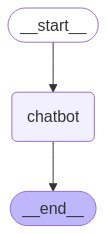

In [18]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [23]:
while True:
    user_input = input("User: ")
    if user_input.lower() == "exit":
        print("Goodbye!")
        break
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        print(event.values())
        for values in event.values():
            print(values["messages"])
            print("Assistant:", values["messages"].content)


dict_values([{'messages': AIMessage(content="Hello! It's nice to meet you. Is there something I can help you with, or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 11, 'total_tokens': 37, 'completion_time': 0.074285714, 'prompt_time': 0.000240559, 'queue_time': 0.053028776, 'total_time': 0.074526273}, 'model_name': 'Llama3-70b-8192', 'system_fingerprint': 'fp_2e0feca3c9', 'finish_reason': 'stop', 'logprobs': None}, id='run-44b24e95-8bf0-4f6c-9091-e63104fe7022-0', usage_metadata={'input_tokens': 11, 'output_tokens': 26, 'total_tokens': 37})}])
content="Hello! It's nice to meet you. Is there something I can help you with, or would you like to chat?" additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 11, 'total_tokens': 37, 'completion_time': 0.074285714, 'prompt_time': 0.000240559, 'queue_time': 0.053028776, 'total_time': 0.074526273}, 'model_name': 'Llama3-70b-81

In [25]:
graph.map

<bound method Runnable.map of <langgraph.graph.state.CompiledStateGraph object at 0x00000194F52581A0>>